In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ses
%matplotlib inline

In [17]:
dataset = pd.read_csv('penguins_size.csv')
dataset

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [18]:
dataset.shape

(344, 7)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [20]:
dataset.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


<Axes: >

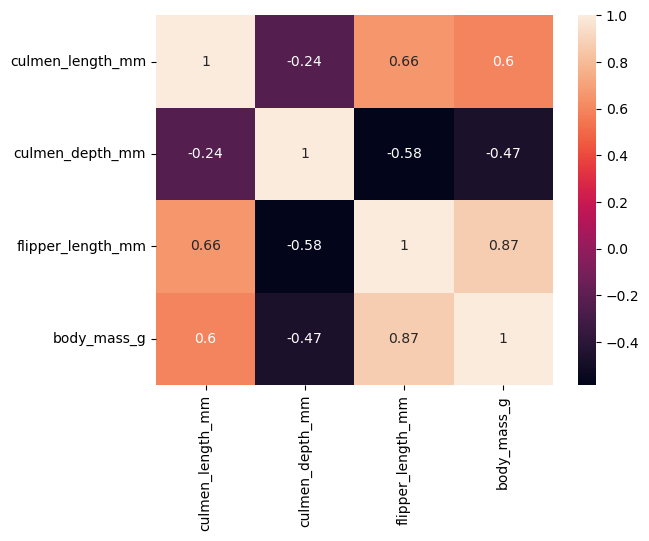

In [21]:
ses.heatmap(dataset.corr(numeric_only=True), annot=True)

## Mission value

In [22]:
dataset.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
dataset.iloc[:, :] = imputer.fit_transform(dataset)
dataset

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,41.1,17.0,190.0,3800.0,MALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [24]:
dataset['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [25]:
dataset[dataset['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [27]:
dataset.at[336, 'sex'] = 'FEMALE'

In [28]:
dataset['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Text(0.5, 1.0, 'Culmenl length')

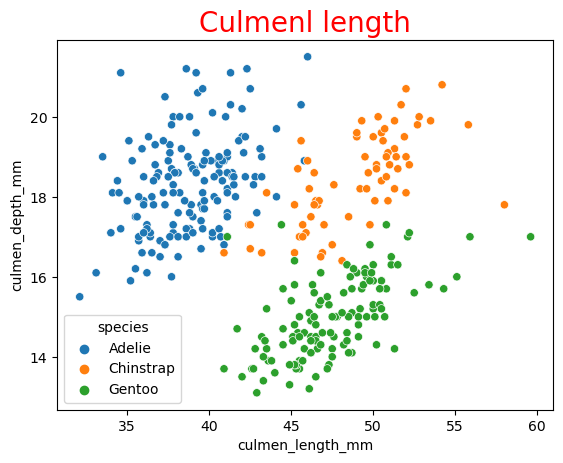

In [31]:
ses.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=dataset, hue='species')
plt.title('Culmenl length', size=20, color='red')

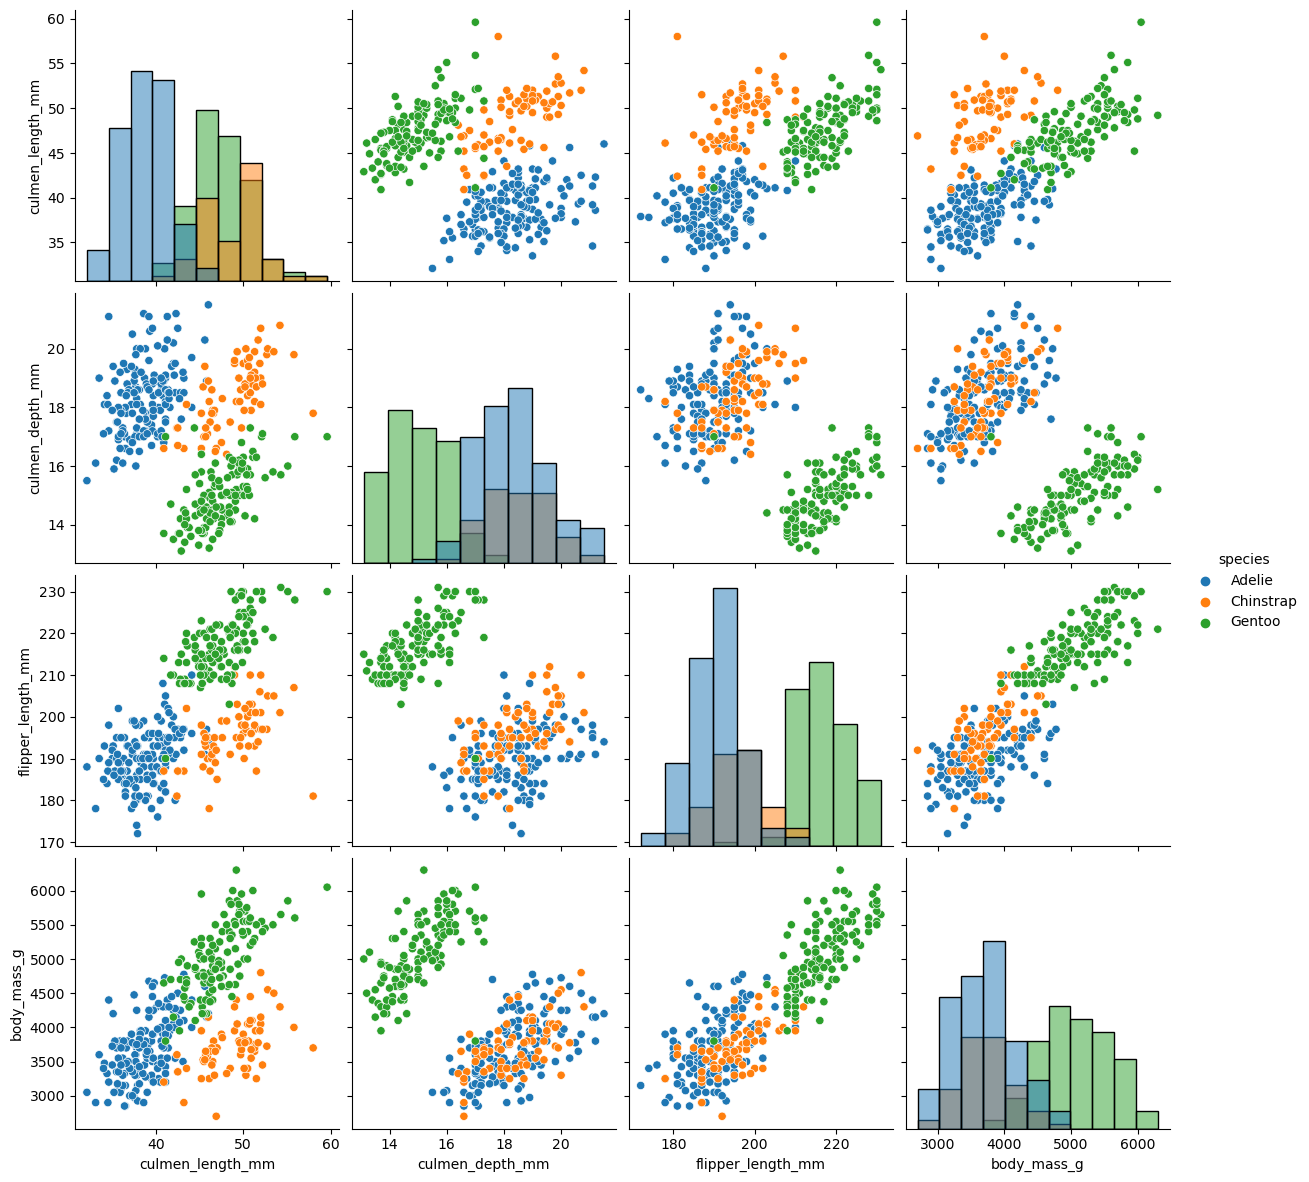

In [32]:
ses.pairplot(dataset, hue='species', height=3, diag_kind='hist')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

matrix_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

target = dataset.species.values
X_train, X_test, y_train, y_test = train_test_split(dataset[matrix_columns].values, target, test_size=0.5,
                                                    random_state=42)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

1 : 0.22093023255813954
2 : 0.27325581395348836
3 : 0.29069767441860467
4 : 0.26744186046511625
5 : 0.23837209302325582
6 : 0.25
7 : 0.23255813953488372
8 : 0.27325581395348836
9 : 0.28488372093023256


<BarContainer object of 9 artists>

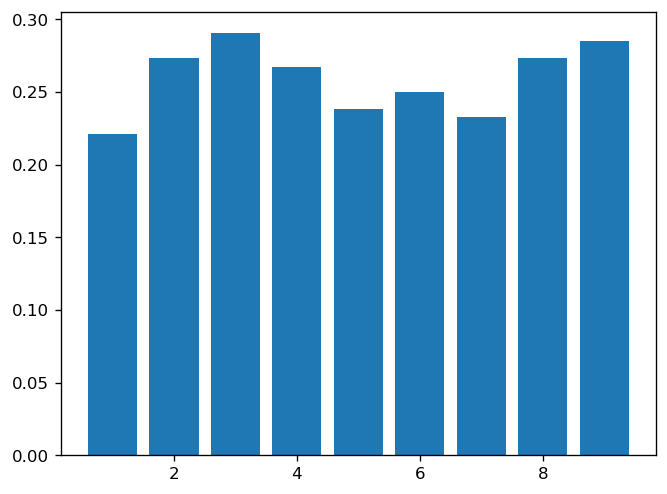

In [52]:
error_rate = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

for i in range(len(error_rate)):
    print(f'{i + 1} : {error_rate[i]}')
y_error = [1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.figure(num=0, dpi=120)
plt.bar(y_error,error_rate)



In [ ]:
# n fold cross validation
# after we check the avg of validation
# live one out after we check what happened with this case
# we divide the data to 3 part
# 1. train set
# 2. validation set
# 3 test set
# confusion matrix
